# Neural Network with Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
diabete_df = pd.read_csv(
    filepath_or_buffer='diabetes.csv'
)

In [4]:
diabete_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabete_df.shape

(768, 9)

In [6]:
diabete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Feature Matrix
X = diabete_df.iloc[:, :-1].values

In [8]:
# Labels Matrix
y = diabete_df['Outcome'].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

rf_model = RandomForestClassifier(n_estimators=200)

rf_model.fit(X_train, y_train)

y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

print(
    f'Accuracy: {accuracy_score(y_test, y_pred_class_rf):.2f}\n'
    f'Roc Auc: {roc_auc_score(y_test, y_pred_prob_rf[:,1]):.2f}'
)

Accuracy: 0.75
Roc Auc: 0.82


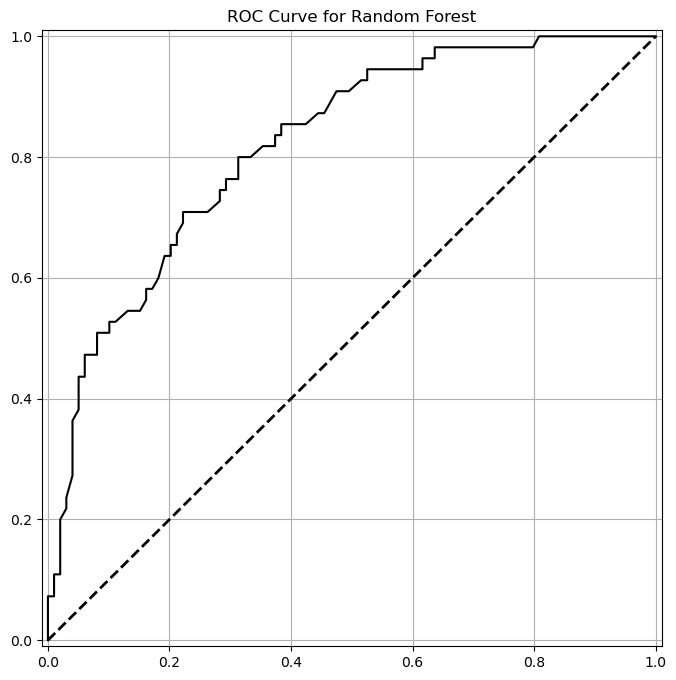

In [11]:
import matplotlib.pyplot as plt

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.plot(fpr, tpr, 'k-')
    
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
    
    ax.grid(True)
    
    ax.set(
        title=f'ROC Curve for {model_name}',
        xlim=[-0.01, 1.01],
        ylim=[-0.01, 1.01]
    )


plot_roc(
    y_test=y_test,
    y_pred=y_pred_prob_rf[:,1],
    model_name='Random Forest'
)

In [12]:
from sklearn.preprocessing import StandardScaler

X_train_scale = StandardScaler().fit_transform(X_train)
X_test_scale = StandardScaler().fit_transform(X_test)

In [13]:
# TensorFlow kütüphanesini yükleyelim
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model_1 = Sequential()

model_1.add(Dense(units=12, input_shape=(8,), activation='sigmoid'))

model_1.add(Dense(1, activation='sigmoid'))

In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_1.compile(
    optimizer=SGD(learning_rate=0.003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

run_hist_1 = model_1.fit(
    X_train_scale,
    y_train,
    validation_data=(X_test_scale, y_test),
    epochs=200
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3285 - loss: 0.7407 - val_accuracy: 0.3571 - val_loss: 0.7292
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3329 - loss: 0.7292 - val_accuracy: 0.3571 - val_loss: 0.7210
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3442 - loss: 0.7209 - val_accuracy: 0.3701 - val_loss: 0.7136
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3632 - loss: 0.7152 - val_accuracy: 0.3896 - val_loss: 0.7065
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4308 - loss: 0.7028 - val_accuracy: 0.4221 - val_loss: 0.7003
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4667 - loss: 0.6967 - val_accuracy: 0.5130 - val_loss: 0.6951
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5208 - loss: 0.6941 - val_accuracy: 0.6104 - val_loss: 0.6902
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5789 - loss: 0.6880 - val_accuracy: 0.6234 - v

In [17]:
y_pred_prob_nn_1 = model_1.predict(X_test_scale)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype('int32')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [18]:
y_pred_class_nn_1[:20]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [19]:
y_pred_prob_nn_1[:20]

array([[0.35453796],
       [0.28962588],
       [0.25865257],
       [0.2745242 ],
       [0.4352005 ],
       [0.42734072],
       [0.17016858],
       [0.3139819 ],
       [0.4292896 ],
       [0.5014209 ],
       [0.35760632],
       [0.5407862 ],
       [0.40948772],
       [0.30533513],
       [0.2080293 ],
       [0.30124113],
       [0.27035782],
       [0.23896945],
       [0.43724462],
       [0.3808839 ]], dtype=float32)

Accuracy: 0.69
Roc-Auc: 0.78


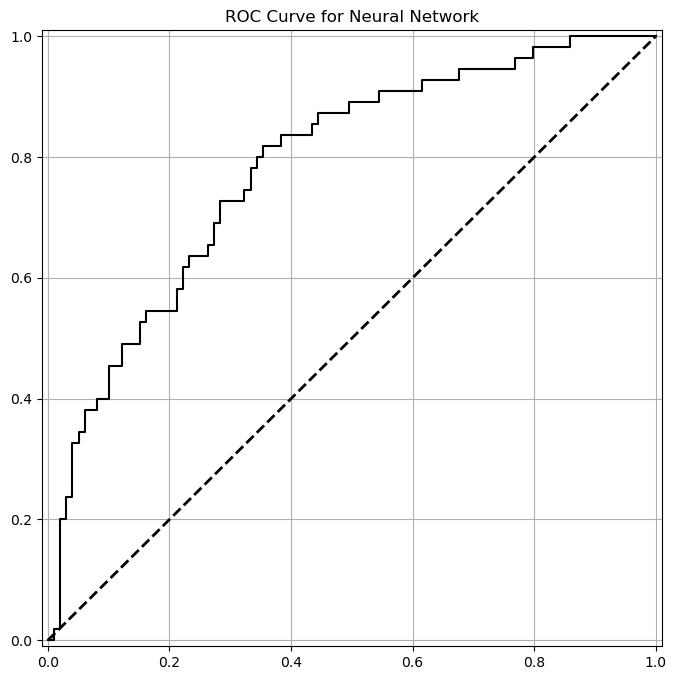

In [20]:
print(
    f'Accuracy: {accuracy_score(y_test, y_pred_class_nn_1):.2f}\n'
    f'Roc-Auc: {roc_auc_score(y_test, y_pred_prob_nn_1):.2f}'
)

plot_roc(y_test, y_pred_prob_nn_1, 'Neural Network')

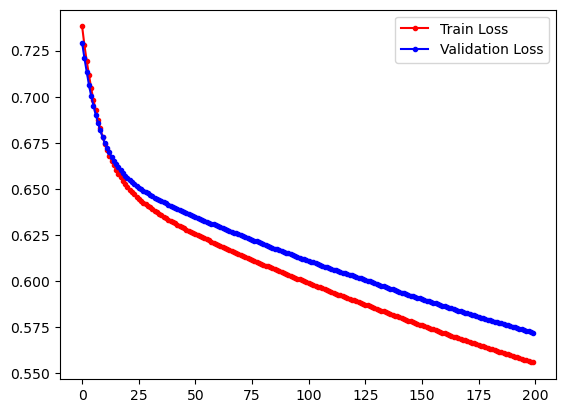

In [21]:
fig, ax = plt.subplots()

ax.plot(run_hist_1.history['loss'], 'r', marker='.', label='Train Loss')
ax.plot(run_hist_1.history['val_loss'], 'b', marker='.', label='Validation Loss')
ax.legend()

In [22]:
run_hist_2 = model_1.fit(
    X_train_scale,
    y_train,
    validation_data=(X_test_scale, y_test),
    epochs=1000
)

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6885 - loss: 0.5682 - val_accuracy: 0.7013 - val_loss: 0.5714
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6956 - loss: 0.5688 - val_accuracy: 0.7013 - val_loss: 0.5711
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7049 - loss: 0.5441 - val_accuracy: 0.7013 - val_loss: 0.5707
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7184 - loss: 0.5464 - val_accuracy: 0.7013 - val_loss: 0.5704
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.5502 - val_accuracy: 0.7013 - val_loss: 0.5700
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7118 - loss: 0.5535 - val_accuracy: 0.7078 - val_loss: 0.5696
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.5646 - val_accuracy: 0.7013 - val_loss: 0.5693
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7335 - loss: 0.5416 - val_accuracy: 0.

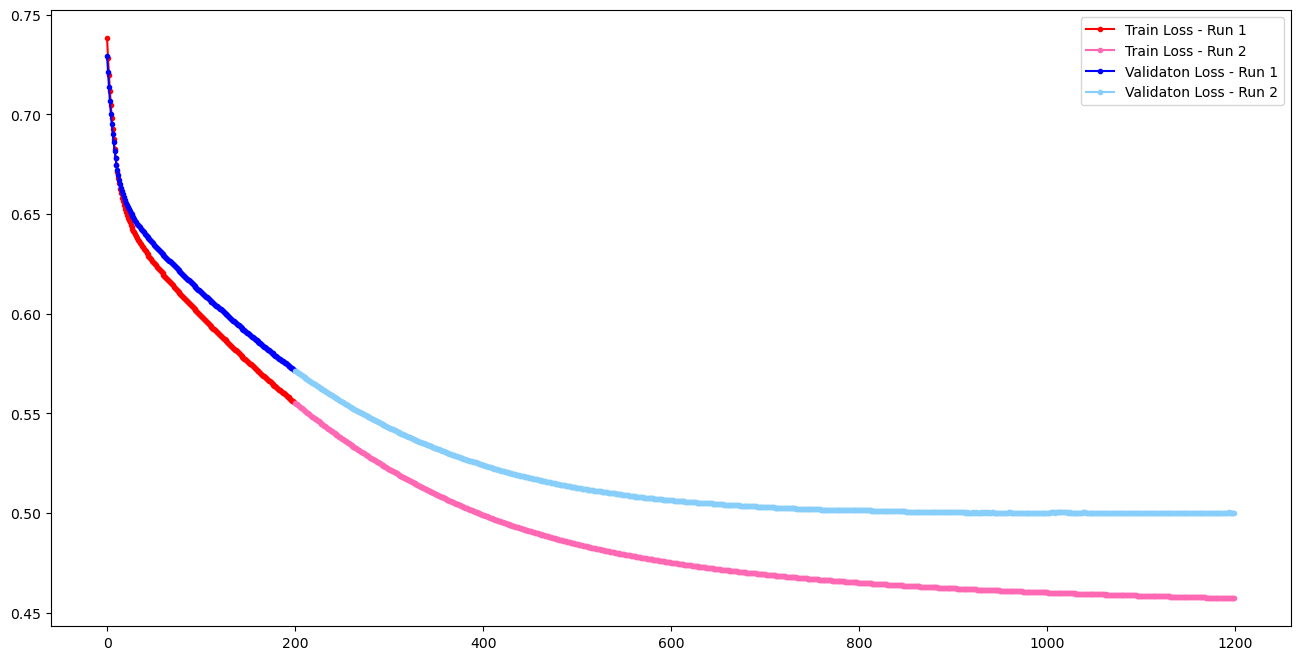

In [23]:
n = len(run_hist_1.history['loss'])
m = len(run_hist_2.history['loss'])

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history['loss'], 'r', marker='.', label='Train Loss - Run 1')
ax.plot(range(n, n+m), run_hist_2.history['loss'], 'hotpink', marker='.', label='Train Loss - Run 2')

ax.plot(range(n), run_hist_1.history['val_loss'], 'b', marker='.', label='Validaton Loss - Run 1')
ax.plot(range(n, n+m), run_hist_2.history['val_loss'], 'LightSkyBlue', marker='.', label='Validaton Loss - Run 2')
ax.legend()

In [31]:
model_2 = Sequential()

model_2.add(Dense(6, input_shape =(8,), activation='relu'))

model_2.add(Dense(6, activation='relu'))

model_2.add(Dense(1, activation='sigmoid'))


model_2.compile(
    optimizer=SGD(learning_rate=0.003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

run_hist_last = model_2.fit(
    X_train_scale,
    y_train,
    validation_data=(X_test_scale, y_test),
    epochs=600
)

Epoch 1/600
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3461 - loss: 0.7754 - val_accuracy: 0.3701 - val_loss: 0.7703
Epoch 2/600
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3811 - loss: 0.7561 - val_accuracy: 0.4026 - val_loss: 0.7597
Epoch 3/600
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4661 - loss: 0.7433 - val_accuracy: 0.4675 - val_loss: 0.7496
Epoch 4/600
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4993 - loss: 0.7426 - val_accuracy: 0.5065 - val_loss: 0.7412
Epoch 5/600
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5232 - loss: 0.7341 - val_accuracy: 0.5260 - val_loss: 0.7341
Epoch 6/600
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5236 - loss: 0.7193 - val_accuracy: 0.5390 - val_loss: 0.7275
Epoch 7/600
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5354 - loss: 0.7221 - val_accuracy: 0.5714 - val_loss: 0.7214
Epoch 8/600
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5627 - loss: 0.7026 - val_accuracy: 0.5844 - v

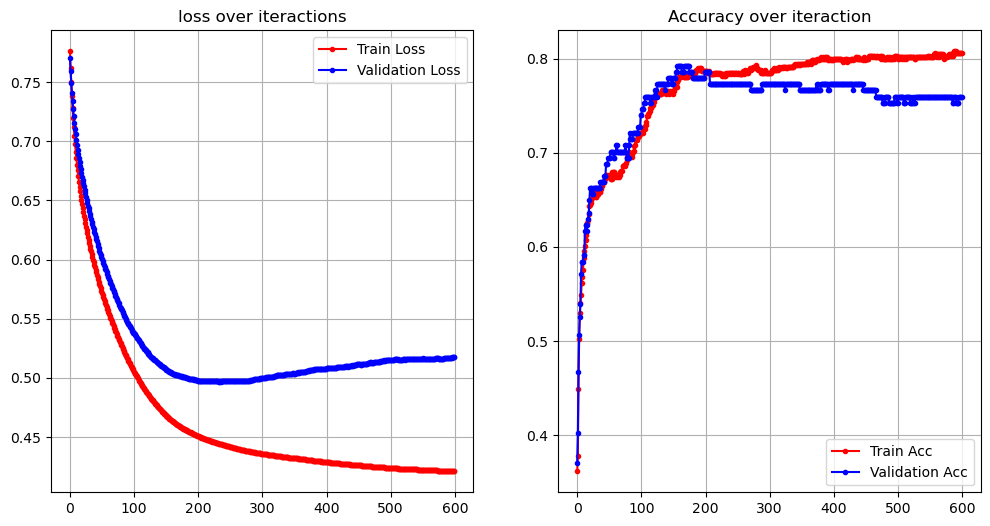

In [34]:
n = len(run_hist_last.history['loss'])

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 2, 1)

ax.plot(range(n), run_hist_last.history['loss'], 'r', marker='.', label='Train Loss')
ax.plot(range(n), run_hist_last.history['val_loss'], 'b', marker='.', label='Validation Loss')
ax.legend()
ax.set_title('loss over iteractions')
ax.grid()

ax = fig.add_subplot(1, 2, 2)

ax.plot(range(n), run_hist_last.history['accuracy'], 'r', marker='.', label='Train Acc')
ax.plot(range(n), run_hist_last.history['val_accuracy'], 'b', marker='.', label='Validation Acc')
ax.legend(loc= 'lower right')
ax.set_title('Accuracy over iteraction')
ax.grid()
